In [36]:
#importing libraries

In [37]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [39]:
#importing the dataset

In [40]:
df1=pd.read_csv('happiness.csv')

In [41]:
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [42]:
#create a copy of original and perform analysis
df=df1.copy()

In [43]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [44]:
df.shape

(158, 12)

In [45]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [46]:
#from analyzing the dataset we came to the result that target variable is Happiness Score

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns

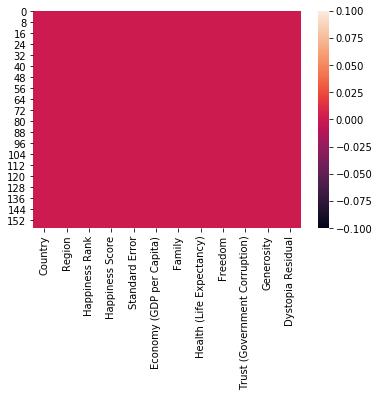

In [49]:
sns.heatmap(df.isnull())

In [50]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [51]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [52]:
#performing data visualization

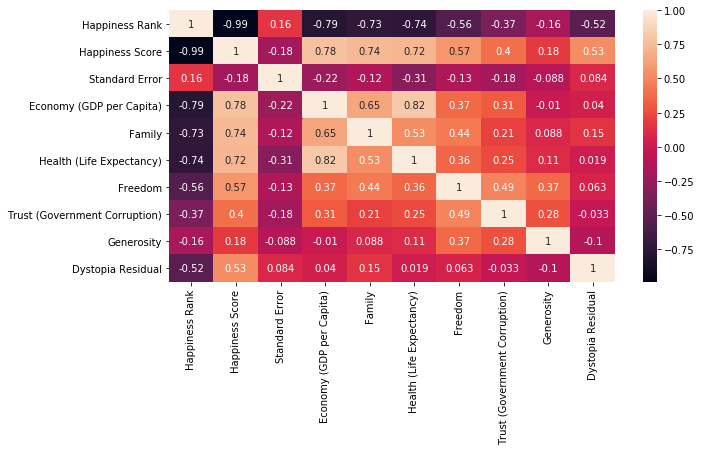

In [53]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [54]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [147]:
#removing skewness of a particular column
from scipy.stats import boxcox

In [56]:
df["Standard Error"]=boxcox(df['Standard Error'],0)

(array([ 3.,  2., 13., 43., 49., 24., 14.,  5.,  4.,  1.]),
 array([-3.99106621, -3.79078813, -3.59051006, -3.39023198, -3.1899539 ,
        -2.98967582, -2.78939774, -2.58911967, -2.38884159, -2.18856351,
        -1.98828543]),
 <a list of 10 Patch objects>)

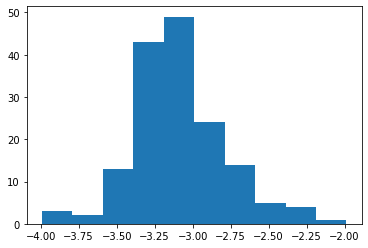

In [57]:
plt.hist(df["Standard Error"])

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le=LabelEncoder()

In [60]:
df['Country']=le.fit_transform(df['Country'])

In [61]:
df["Region"]=le.fit_transform(df['Region'])

In [62]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


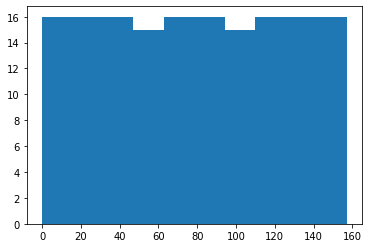

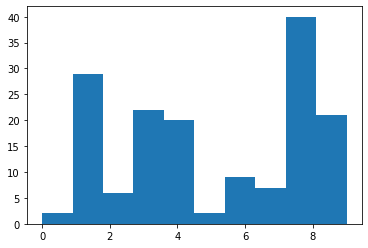

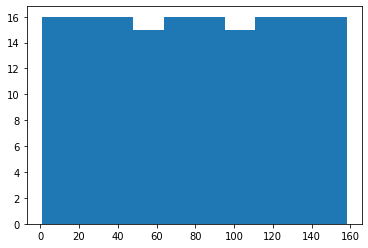

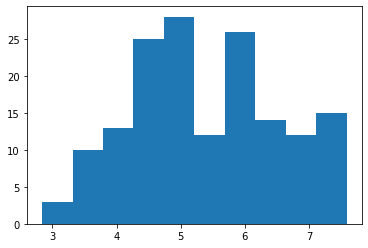

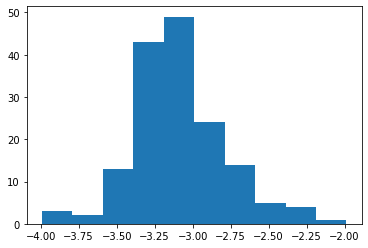

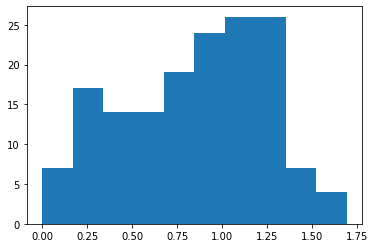

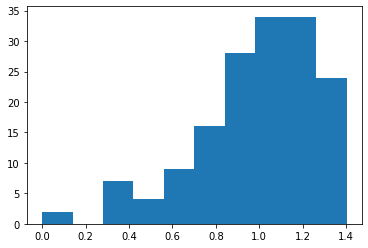

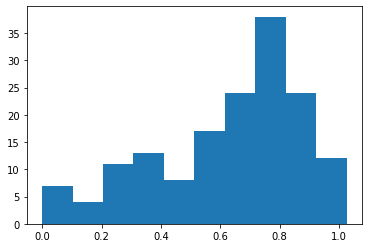

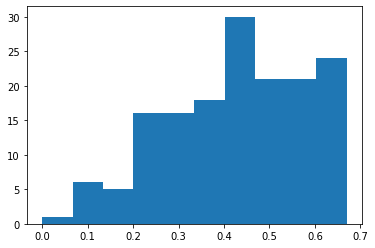

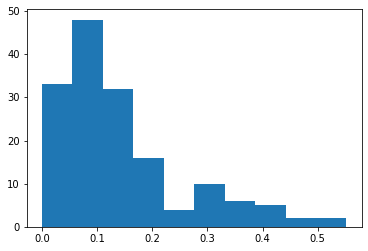

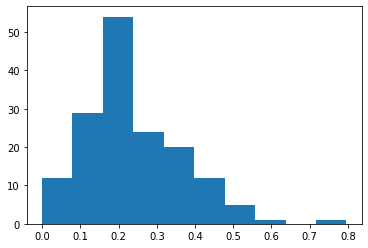

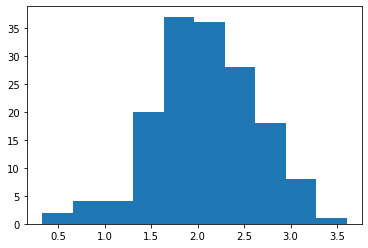

In [63]:
i=1
for i in df.columns:
    plt.figure()
    plt.hist(df[i])

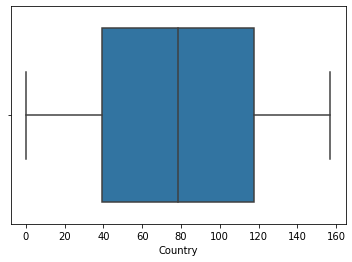

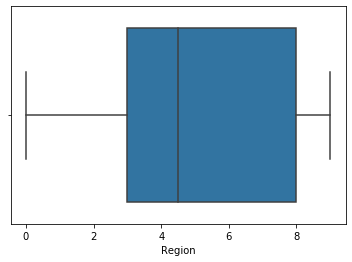

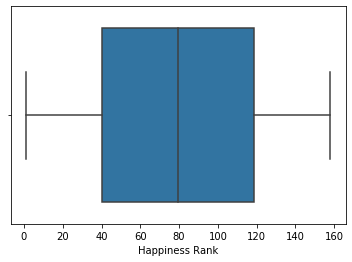

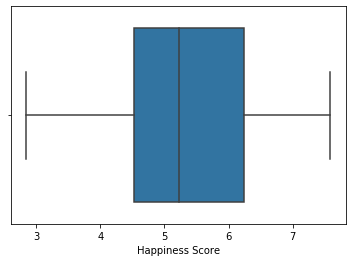

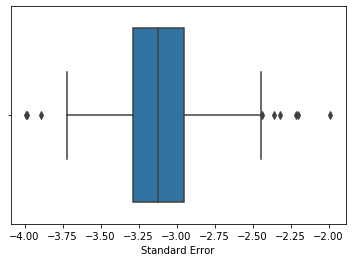

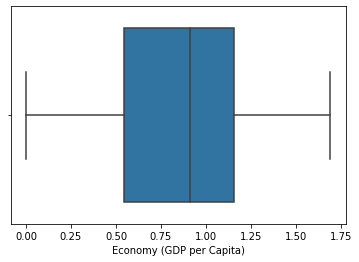

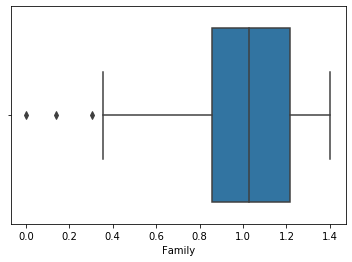

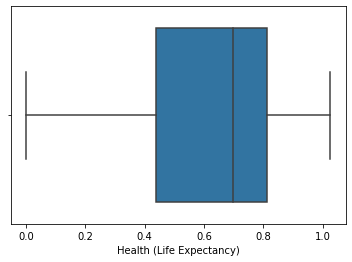

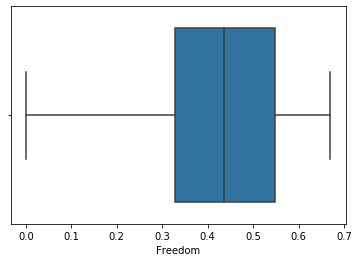

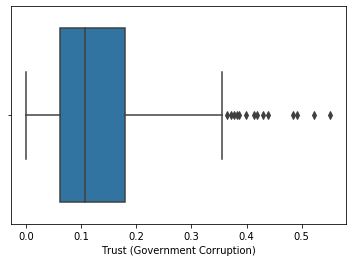

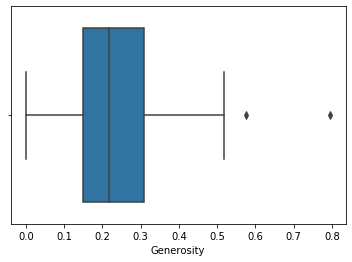

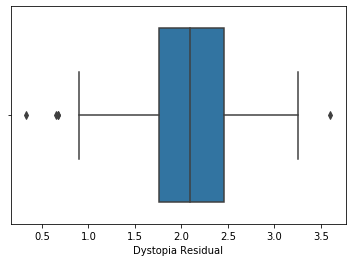

In [64]:
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])

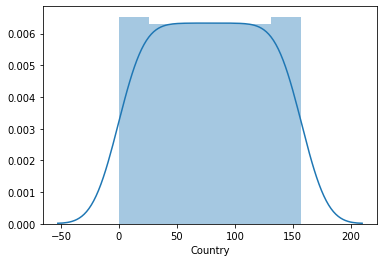

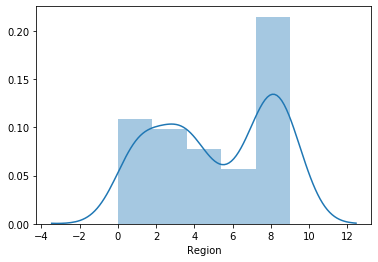

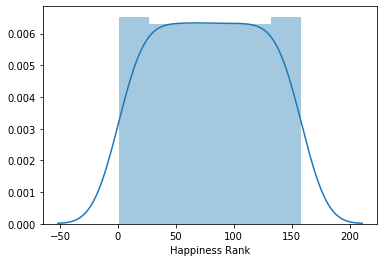

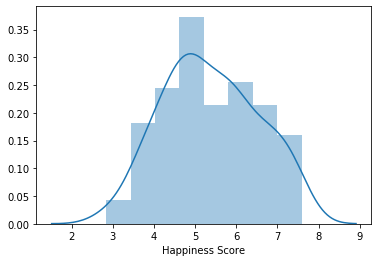

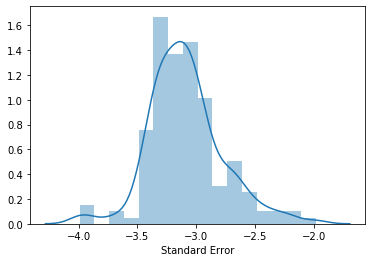

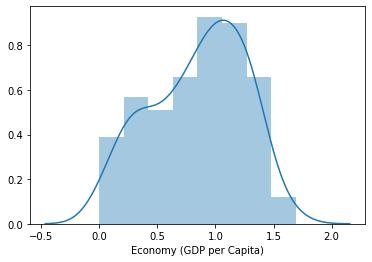

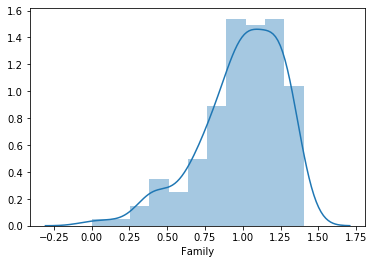

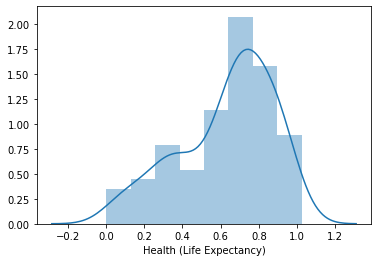

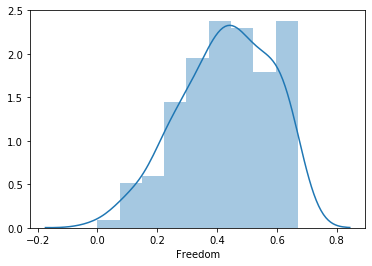

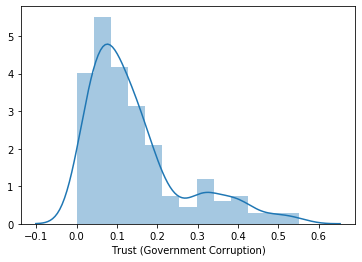

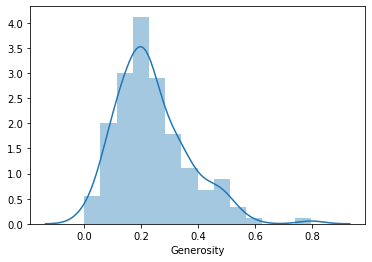

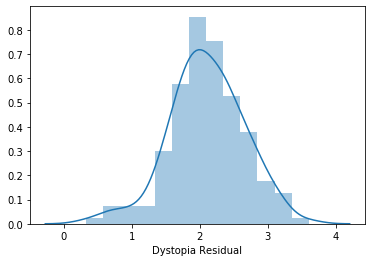

In [80]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

In [65]:
#we can find from the above observation that certain columns in the dataset contains outliers

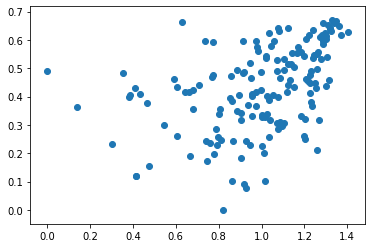

In [66]:
plt.scatter(df['Family'],df['Freedom'])

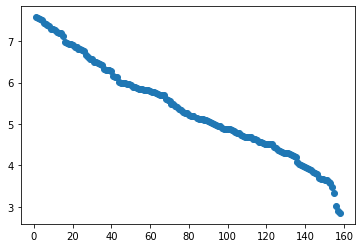

In [67]:
plt.scatter(df['Happiness Rank'],df['Happiness Score'])

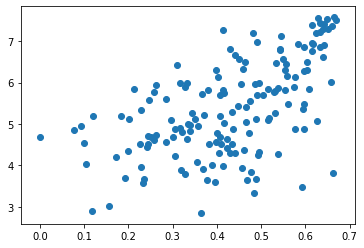

In [68]:
plt.scatter(df['Freedom'],df['Happiness Score'])

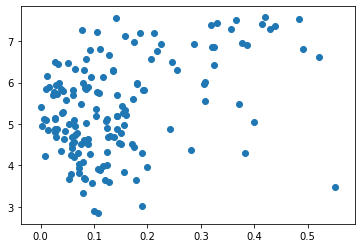

In [70]:
plt.scatter(df['Trust (Government Corruption)'],df['Happiness Score'])

In [71]:
#removing outliers from the dataset

In [73]:
from scipy.stats import zscore

In [74]:
z=np.abs(zscore(df))

In [75]:
threshold=3
print(np.where(z>3))

(array([ 27,  64, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4, 10,  6,  9, 11,  6], dtype=int64))


In [76]:
z[27][9]

3.1646194851713774

In [77]:
df_new=df[(z<3).all(axis=1)]

In [78]:
df.shape     #with outliers

(158, 12)

In [79]:
df_new.shape   #without outliers

(151, 12)

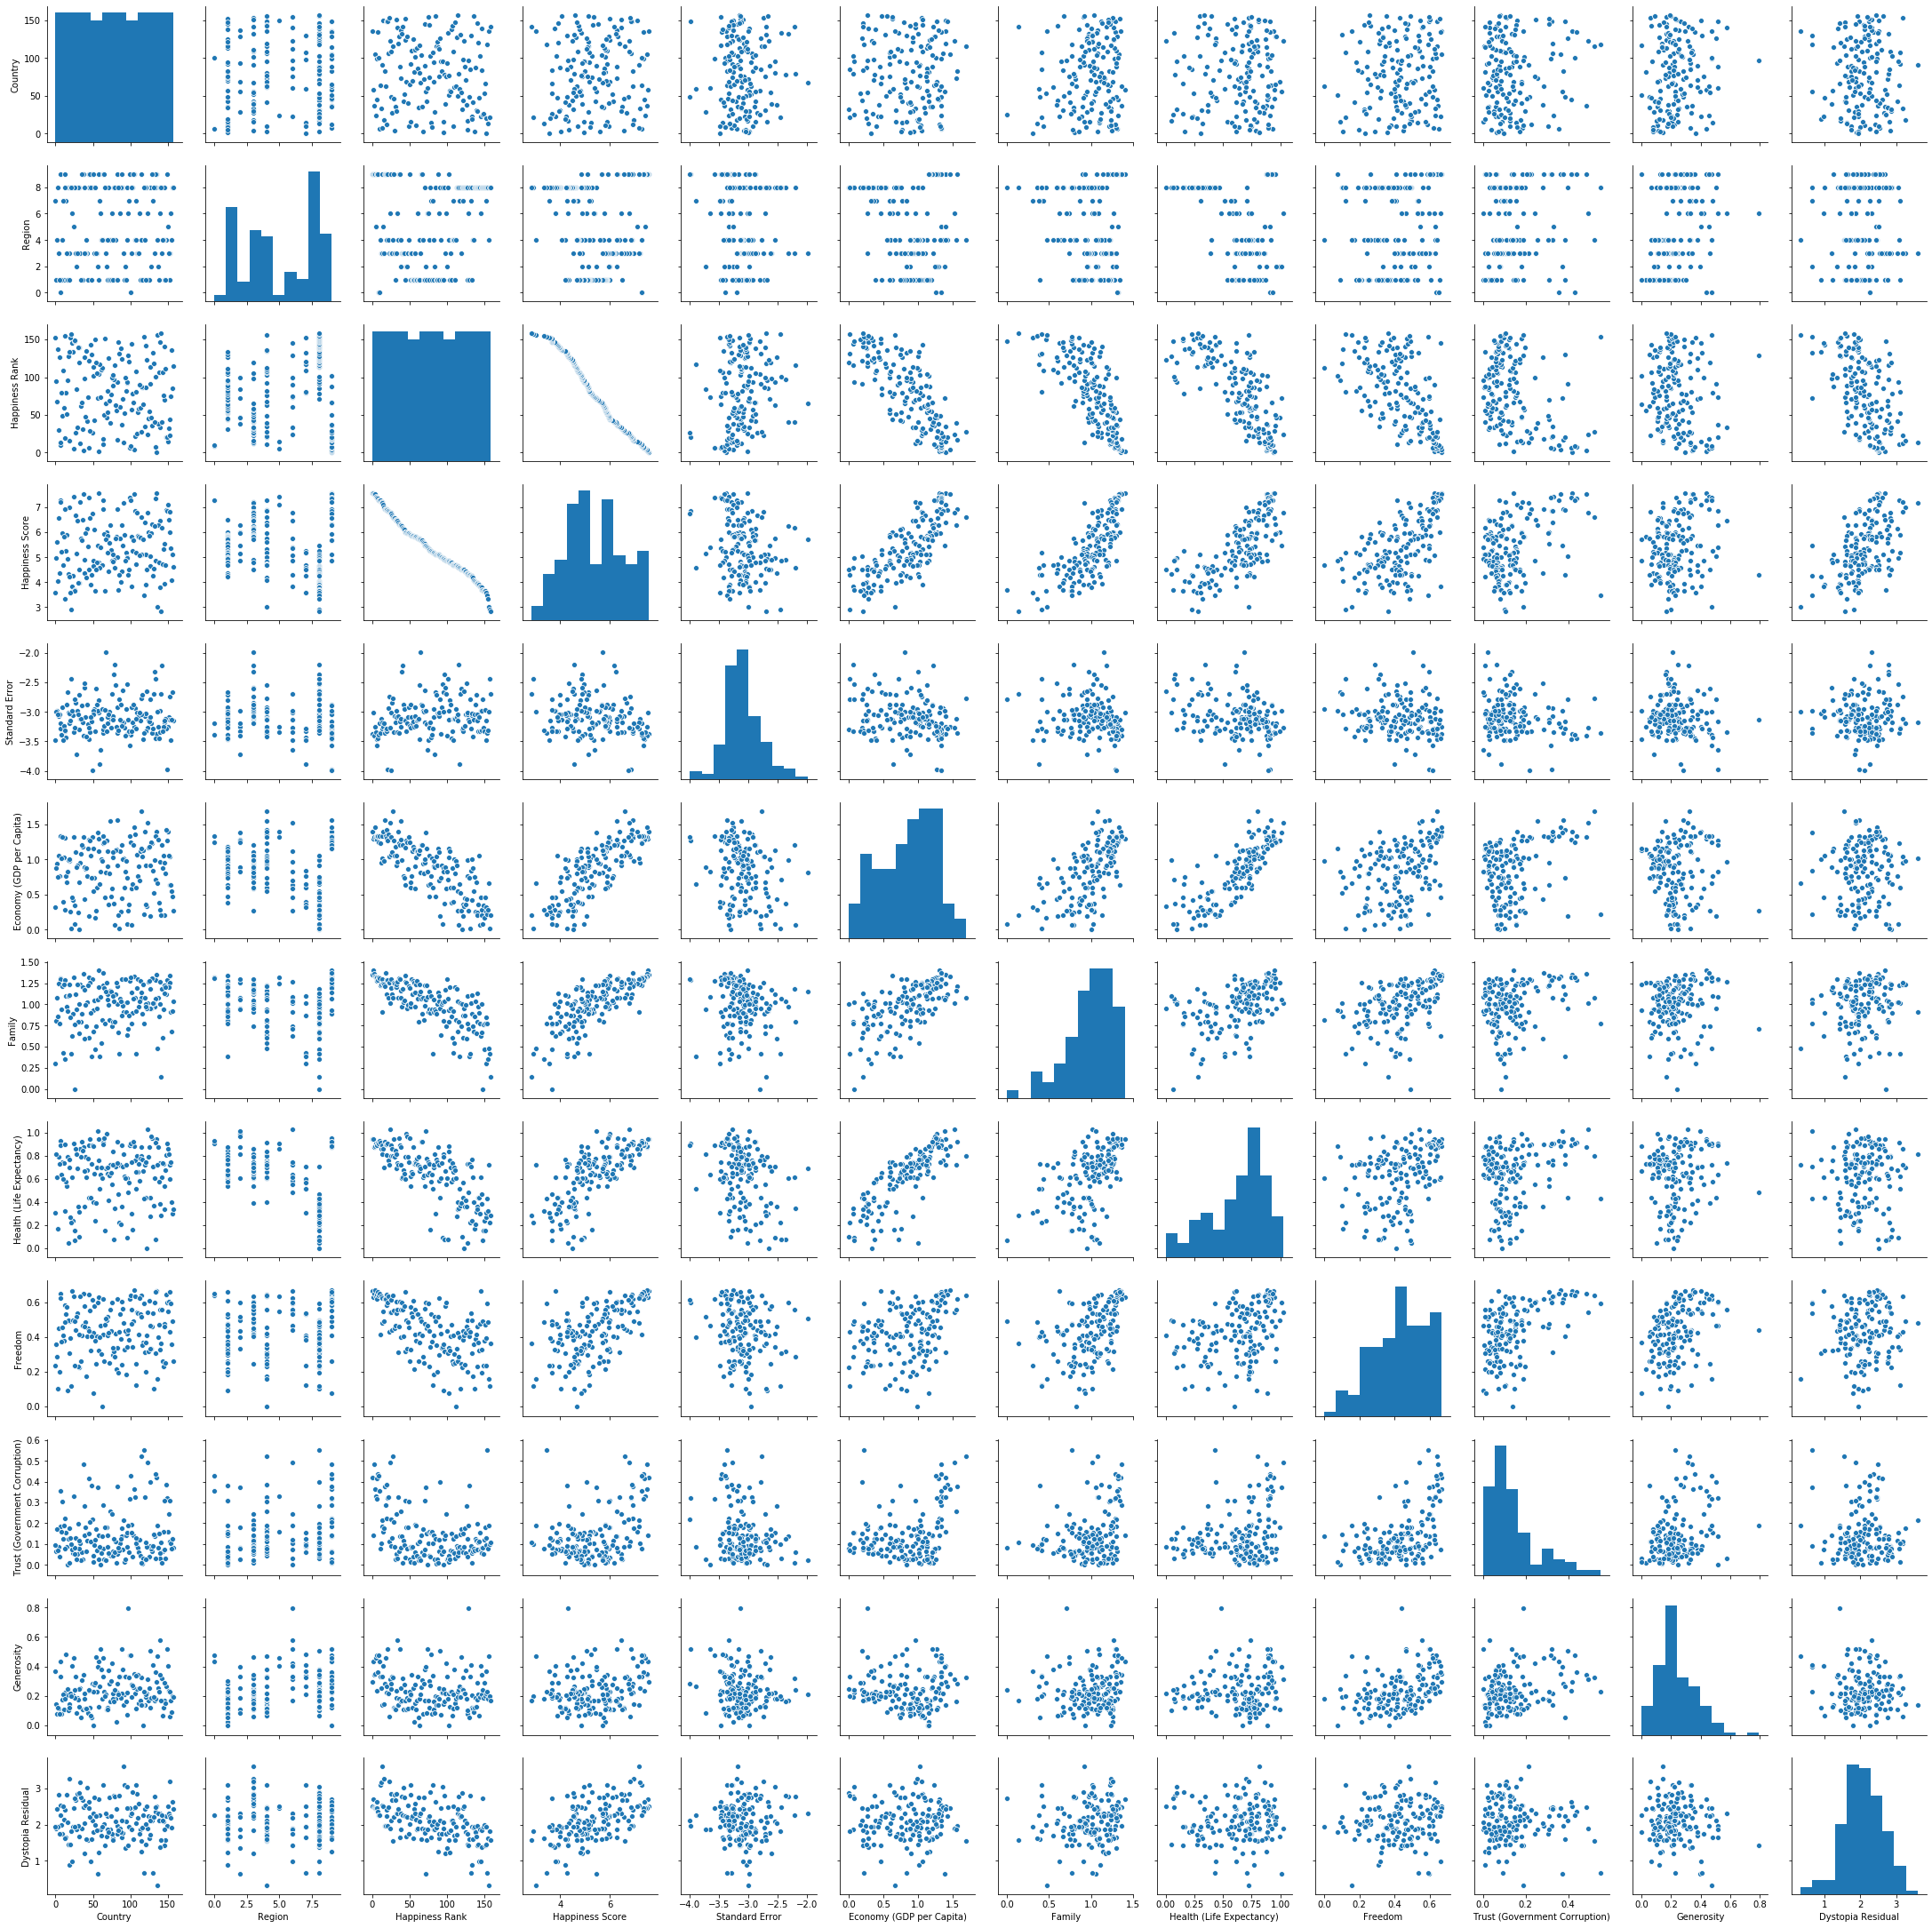

In [81]:
sns.pairplot(df)

In [88]:
x=df.drop('Happiness Score',axis=1)
x.columns

Index(['Country', 'Region', 'Happiness Rank', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [91]:
x.shape

(158, 11)

In [92]:
y=df["Happiness Score"].values
y=y.reshape(-1,1)

In [93]:
y.shape

(158, 1)

In [94]:
#implementing using Linear Regression algorithm

In [97]:
max_r2_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r_score=r2_score(pred,y_test)
    print("r2 score for the random state ",r_state,"is ",r_score)
    if max_r2_score<r_score:
        max_r2_score=r_score
        final_r_state=r_state
        
print('\n')
print('\n')

print("the max r2 score for the final random state:",final_r_state,"is: ",max_r2_score)

r2 score for the random state  42 is  0.999999938101118
r2 score for the random state  43 is  0.999999930954595
r2 score for the random state  44 is  0.9999999202840517
r2 score for the random state  45 is  0.9999999373634129
r2 score for the random state  46 is  0.9999999249090739
r2 score for the random state  47 is  0.9999999237551958
r2 score for the random state  48 is  0.9999999311482671
r2 score for the random state  49 is  0.9999999130561602
r2 score for the random state  50 is  0.9999999416633664
r2 score for the random state  51 is  0.9999998940646669
r2 score for the random state  52 is  0.999999913384491
r2 score for the random state  53 is  0.9999999333226903
r2 score for the random state  54 is  0.9999999556367143
r2 score for the random state  55 is  0.9999999239805105
r2 score for the random state  56 is  0.9999999263702303
r2 score for the random state  57 is  0.9999999390770342
r2 score for the random state  58 is  0.9999998893095274
r2 score for the random state  59 

In [98]:
#finalising the model using random state = 54

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=54,test_size=0.33)

In [107]:
lr=LinearRegression()

In [108]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
lr.coef_

array([[-1.14942768e-06, -1.17836299e-05, -7.50214576e-06,
        -3.85935431e-05,  9.99826058e-01,  9.99781981e-01,
         9.99383777e-01,  9.99233344e-01,  9.99735440e-01,
         9.99932291e-01,  9.99700391e-01]])

In [110]:
lr.intercept_

array([0.00234773])

In [111]:
predlr=lr.predict(x_test)

In [112]:
print(predlr,"\t",y_test)

[[7.58665648]
 [6.41112291]
 [4.36907783]
 [6.57409627]
 [4.87597014]
 [4.51789503]
 [6.12281177]
 [4.87431179]
 [3.3400754 ]
 [5.01300607]
 [6.4546216 ]
 [4.86712199]
 [3.65591858]
 [2.90477456]
 [7.42687735]
 [4.51711586]
 [5.9871035 ]
 [4.63339443]
 [5.88903959]
 [4.2966109 ]
 [7.27761535]
 [7.36343021]
 [5.88981614]
 [2.83894942]
 [3.68084469]
 [7.22562518]
 [4.03312669]
 [6.00274948]
 [5.94816898]
 [3.90367683]
 [4.30698314]
 [5.75861112]
 [4.88454161]
 [5.12876337]
 [5.99513417]
 [5.39879893]
 [3.00641503]
 [4.73844305]
 [6.26913922]
 [6.16764667]
 [5.25295857]
 [5.36010789]
 [6.66970519]
 [6.86709827]
 [4.69393162]
 [5.05721381]
 [3.99478102]
 [6.78612858]
 [5.00705732]
 [6.48501075]
 [5.4738507 ]
 [4.95941875]
 [4.56460983]] 	 [[7.587]
 [6.411]
 [4.369]
 [6.574]
 [4.876]
 [4.518]
 [6.123]
 [4.874]
 [3.34 ]
 [5.013]
 [6.455]
 [4.867]
 [3.656]
 [2.905]
 [7.427]
 [4.517]
 [5.987]
 [4.633]
 [5.889]
 [4.297]
 [7.278]
 [7.364]
 [5.89 ]
 [2.839]
 [3.681]
 [7.226]
 [4.033]
 [6.003]
 [5

In [113]:
print(r2_score(predlr,y_test))

0.9999999556367143


In [114]:
print(mean_absolute_error(predlr,y_test))

0.00020786037093478284


In [115]:
print(mean_squared_error(predlr,y_test))

6.468263738646996e-08


In [116]:
#performing regularisation techniques to avoid over and under fitting

In [117]:
from sklearn.linear_model import Lasso,Ridge  

In [120]:
ls=Lasso(alpha=0.01)

In [121]:
ls.fit(x_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [128]:
ls.coef_

array([-0.00016069,  0.01326329, -0.02454029, -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

<BarContainer object of 11 artists>

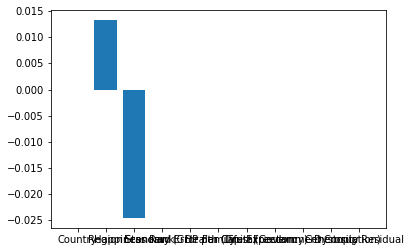

In [131]:
plt.bar(x.columns,ls.coef_)

In [132]:
ls.predict(x_test)

array([7.36276052, 6.46464524, 4.29754798, 6.59256331, 4.92766362,
       4.40044249, 6.26582615, 4.84717767, 3.58989685, 5.0697052 ,
       6.51233751, 4.89578931, 3.70617053, 3.53953071, 7.22938331,
       4.44575391, 6.17637087, 4.59010316, 6.01200915, 4.10493686,
       7.06245048, 7.19113916, 6.07544951, 3.49570705, 3.77480987,
       7.02962844, 4.03322907, 6.19868981, 6.17153479, 3.89172633,
       4.18791954, 5.77592651, 4.91819906, 5.28473802, 6.17864897,
       5.54358137, 3.49253796, 4.69388746, 6.32659145, 6.30044421,
       5.44153515, 5.50393577, 6.66248821, 6.86970493, 4.70596913,
       5.14231711, 3.99519042, 6.69839183, 5.00730339, 6.5198606 ,
       5.54025159, 4.97139977, 4.50177274])

In [133]:
rd=Ridge(alpha=0.001)

In [134]:
rd.fit(x_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [135]:
rd.coef_

array([[-2.42543847e-06,  5.72168443e-05, -1.50523172e-04,
        -2.94851917e-04,  9.94080428e-01,  9.94148464e-01,
         9.93121500e-01,  9.92899295e-01,  9.94285976e-01,
         9.94904800e-01,  9.93887963e-01]])

In [127]:
rd.predict(x_test)

array([[7.58539783],
       [6.4115106 ],
       [4.36850423],
       [6.57412955],
       [4.87623228],
       [4.51741644],
       [6.12358539],
       [4.87434986],
       [3.34145425],
       [5.01320827],
       [6.45518322],
       [4.86731328],
       [3.65633072],
       [2.90841349],
       [7.4259494 ],
       [4.51701483],
       [5.98810324],
       [4.63310067],
       [5.8898245 ],
       [4.29534324],
       [7.27647909],
       [7.36254927],
       [5.89080362],
       [2.84252453],
       [3.6814595 ],
       [7.22439739],
       [4.03333776],
       [6.00392347],
       [5.94945379],
       [3.90366055],
       [4.30670403],
       [5.75859516],
       [4.88456625],
       [5.12955436],
       [5.99622047],
       [5.3999522 ],
       [3.00938016],
       [4.73803411],
       [6.26916979],
       [6.16822533],
       [5.25433842],
       [5.36078062],
       [6.66966531],
       [6.86746807],
       [4.6939726 ],
       [5.0579106 ],
       [3.99482297],
       [6.785

In [136]:
from sklearn.model_selection import cross_val_score

In [137]:
score=cross_val_score(lr,x,y,cv=5)

In [138]:
score

array([0.99999949, 0.99999846, 0.99999827, 0.99999564, 0.99999935])

In [139]:
#serialisation and deserialisation of model

In [140]:
from sklearn.externals import joblib

In [141]:
filename='happiness.obj'

In [142]:
joblib.dump(lr,filename)

['happiness.obj']

In [144]:
#jb=joblib.load(filename)

In [146]:
#jb.predict(x_test)